In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [2]:

# Set parameters
img_height = 150
img_width = 100
# img_height = 200
# img_width = 200
num_classes = 100  # Assuming 100 classes in your dataset

# Set up data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    rescale=1.0 / 255.0
)

# Load and preprocess the training and testing datasets
# Replace 'path/to/train' and 'path/to/test' with your actual dataset paths
train_datagen = data_augmentation.flow_from_directory(
    'train_test_img_1900x300/train_preprocess',
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='grayscale',  # Convert to grayscale
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0).flow_from_directory(
    'train_test_img_1900x300/test_preprocess',
    target_size=(img_height, img_width),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 1900 images belonging to 100 classes.
Found 200 images belonging to 100 classes.


# CNN Model

In [11]:

# Build a simple CNN architecture (80%)
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(num_classes, activation='softmax')  # Output layer with 100 classes
# ])

# Cnn Architecture epochs(200) image(150x100) accuracy(100%)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),  # Image size (150, 100) and single channel (grayscale)
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Add dropout to third Conv layer
    layers.Flatten(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.4),  # Keep the original dropout
    layers.Dense(100, activation='softmax')  # Output layer with 100 classes
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\PC-MOH\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 98, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 21760)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │    10,880,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        50,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,023,272 (42.05 MB)

 Trainable params: 11,023,272 (42.05 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model (250epochs=>94%)
history = model.fit(
    train_datagen,
    validation_data=test_datagen,
    epochs=50  # Adjust the number of epochs as needed
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.9300 - loss: 0.2108 - val_accuracy: 0.9800 - val_loss: 0.0356
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.8984 - loss: 0.3298 - val_accuracy: 0.9950 - val_loss: 0.0211
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 167ms/step - accuracy: 0.9145 - loss: 0.2562 - val_accuracy: 0.9700 - val_loss: 0.1316
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.9091 - loss: 0.2869 - val_accuracy: 0.9950 - val_loss: 0.0157
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.9123 - loss: 0.2573 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.9344 - loss: 0.1967 - val_accuracy: 0.9950 - val_loss: 0.0273
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9145 - loss: 0.2826 - val_accuracy: 0.9800 - val_loss: 0.0370
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.9224 - loss: 0.2215 - val_accu

In [32]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_datagen)
print("Test loss CNN:", test_loss)
print("Test accuracy CNN:", test_accuracy)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9973 - loss: 0.0105
Test loss CNN: 0.013921517878770828
Test accuracy CNN: 0.9950000047683716


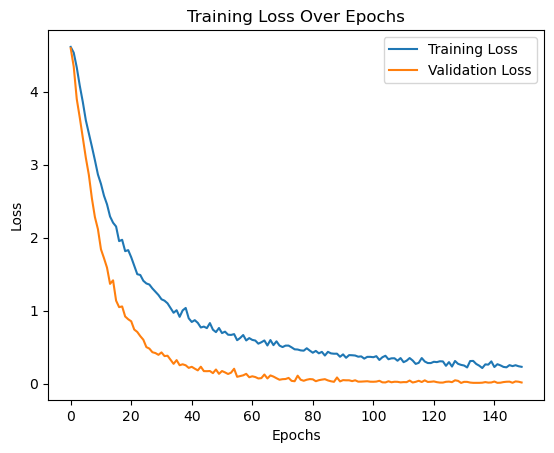

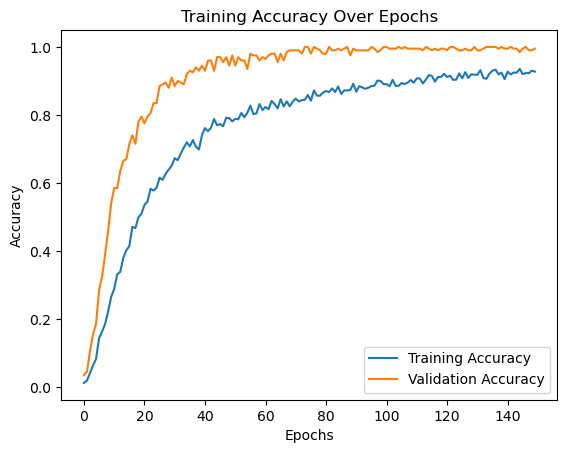

In [23]:
import matplotlib.pyplot as plt

# Plot the training loss over epochs
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Training loss over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.title('Training Loss Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot

# Plot the training accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
plt.xlabel('Epochs')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.title('Training Accuracy Over Epochs')  # Plot title
plt.legend()  # Display the legend
plt.show()  # Display the plot


## Save the model

In [15]:
# Save the model
model.save("my_cnn_model.h5")

## Load the model

In [3]:
model = models.load_model("my_cnn_model_img150x100.h5")

## Confusion Matrix

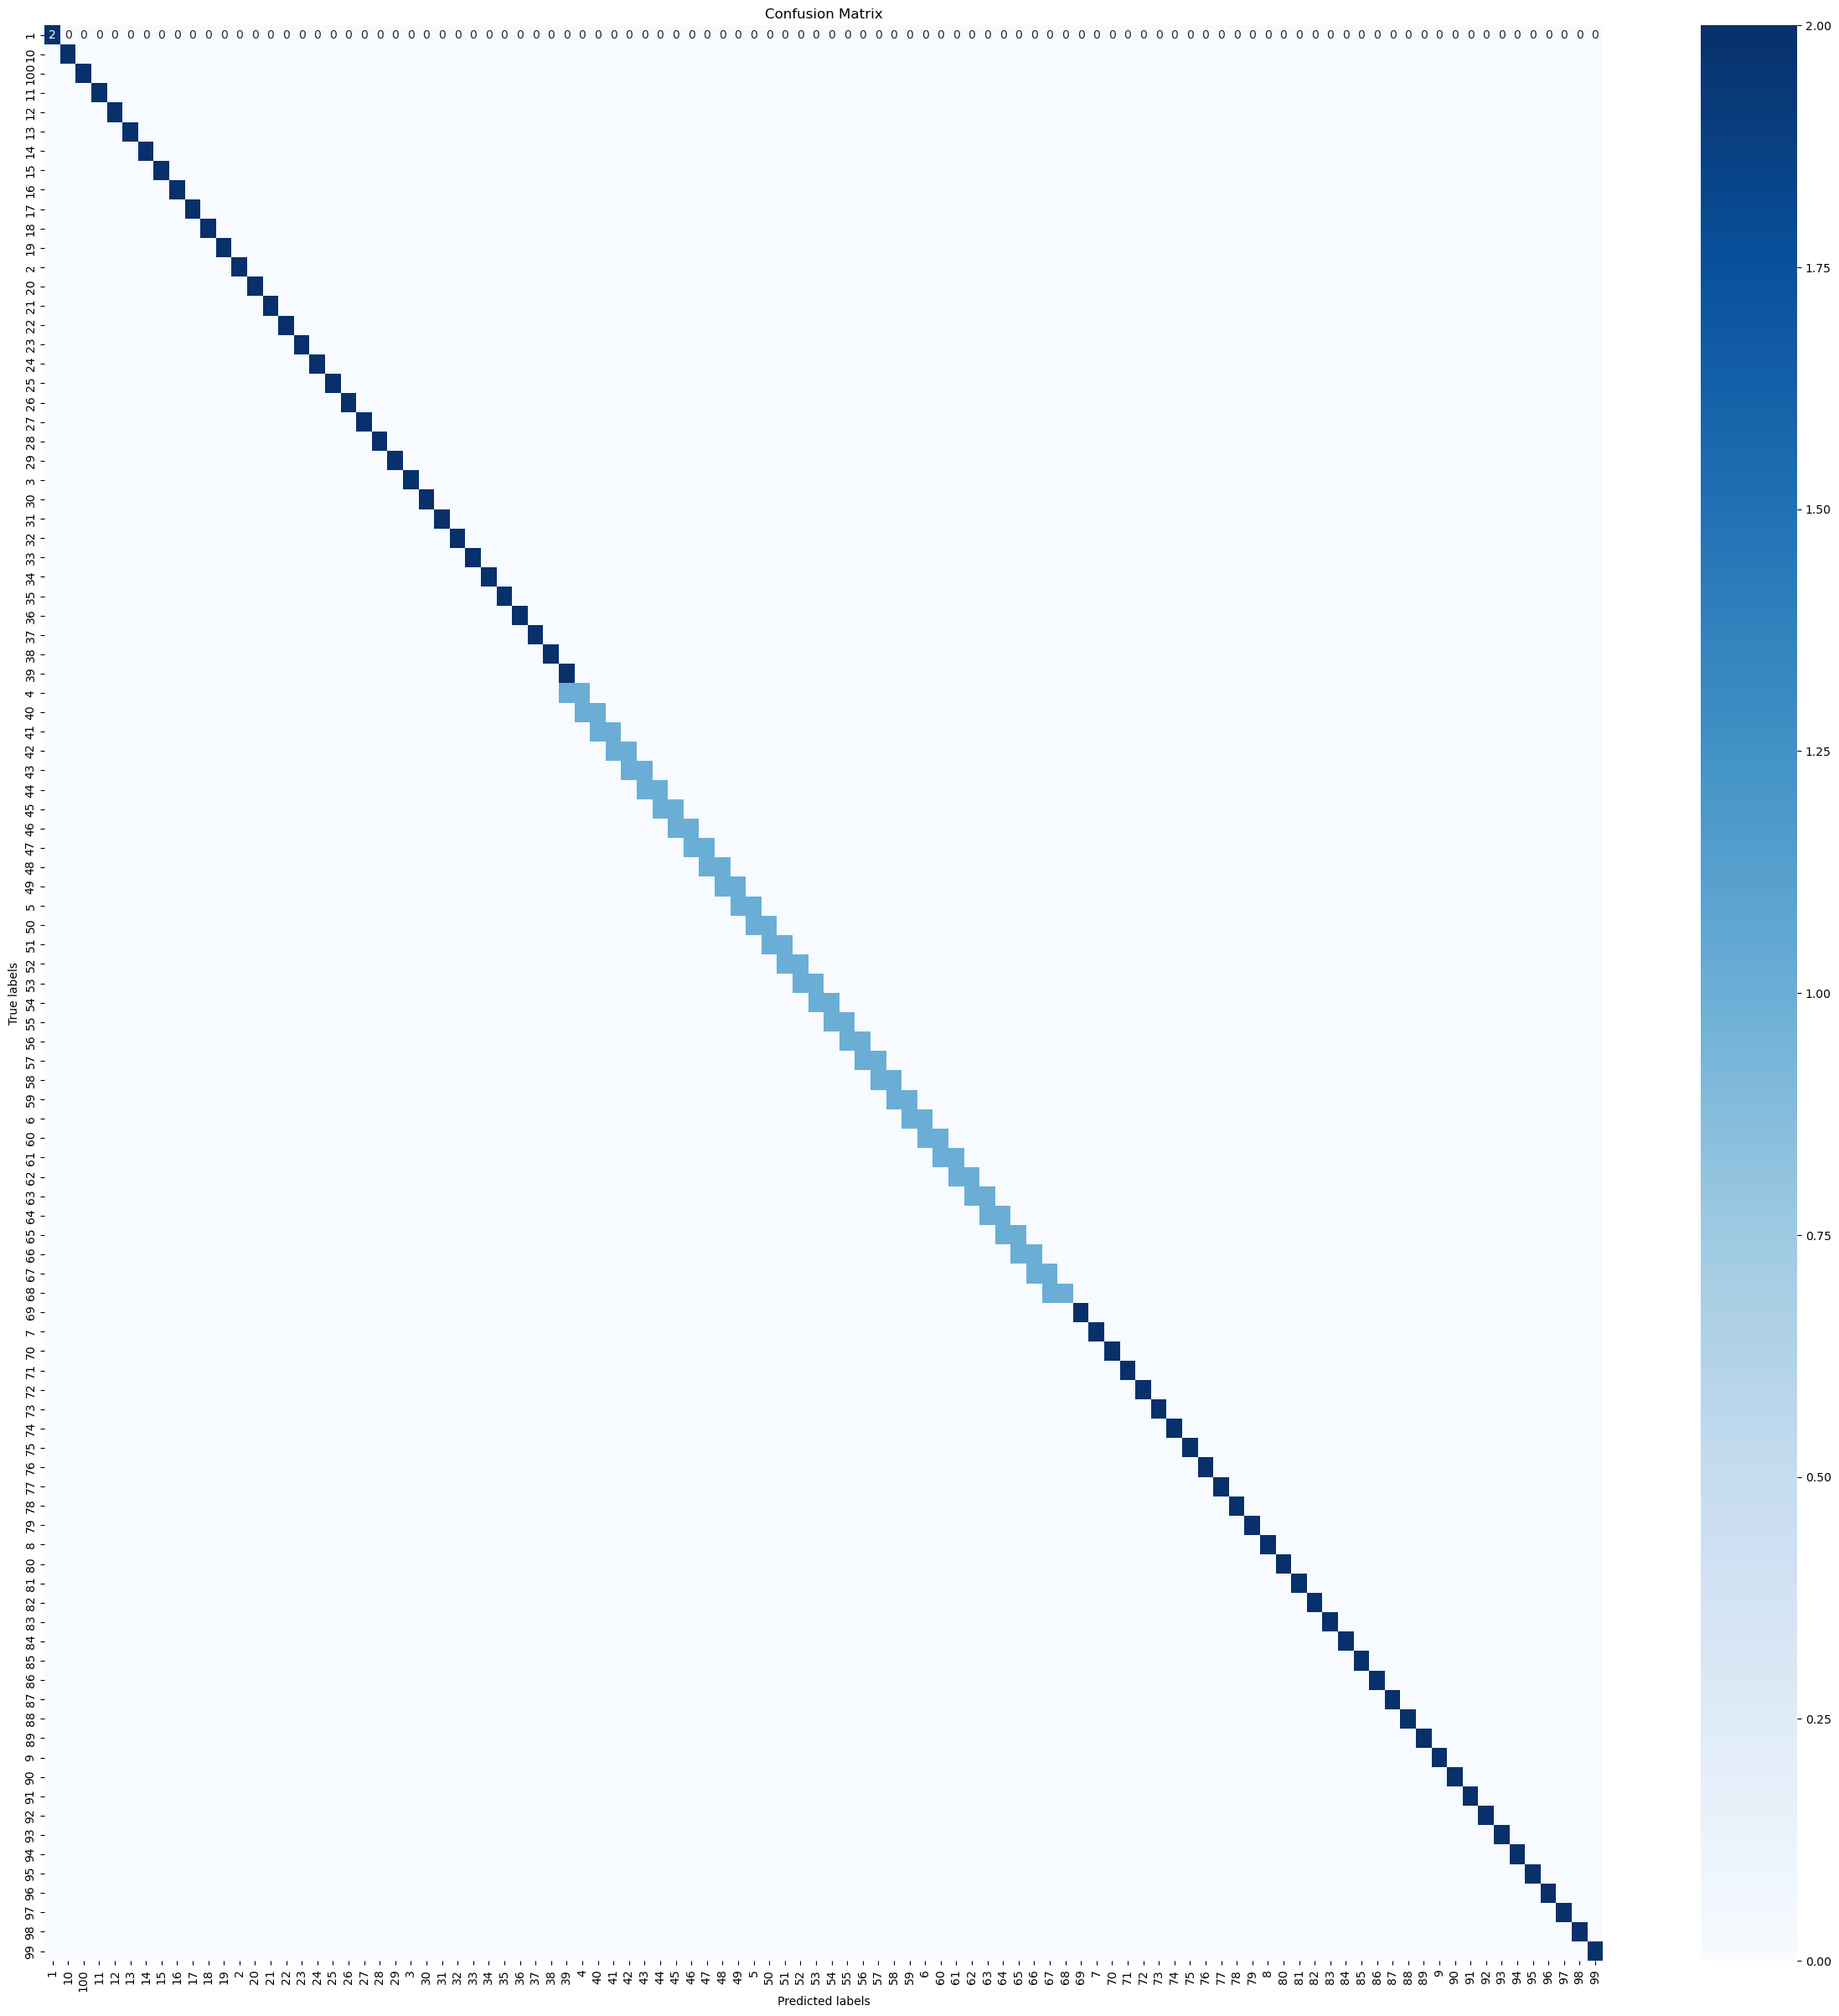

In [8]:


# Visualize confusion matrix
plt.figure(figsize=(30, 30))
sns.heatmap(confusion, annot=True, fmt='d', cmap="Blues", xticklabels=test_datagen.class_indices.keys(), yticklabels=test_datagen.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Calculate Errors

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
predictions = model.predict(test_datagen)
y_true = test_datagen.classes
y_pred = np.argmax(predictions, axis=1)
y_pred.sort()

# Confusion Matrix
confusion = confusion_matrix(y_true,y_pred)

fp =confusion.sum(axis =0)- np.diag(confusion)
fn = confusion.sum(axis =1)- np.diag(confusion)
tp =  np.diag(confusion)
tn= confusion.sum()- (fp + fn + tp)

# Calculter le taux d'erreur
frr = fn /(tp + fn)
far = fp / (tn + fp)
eer = (frr + far) / 2
print("Taux de faux rejet (FRR) : {:.2f}%".format(frr.mean() * 100))
print("Taux de fausse acceptation (FAR) : {:.2f}%".format(far.mean() * 100))
print("Taux d'erreur égal (EER) : {:.2f}%".format(eer.mean() * 100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Taux de faux rejet (FRR) : 16.00%
Taux de fausse acceptation (FAR) : 0.16%
Taux d'erreur égal (EER) : 8.08%


In [10]:
# Get predicted probabilities for the test set
y_pred_probs = model.predict(test_datagen)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)
y_pred.sort()

# Get true labels from the test generator
y_true = test_datagen.classes

# To get class labels
class_labels = list(test_datagen.class_indices.keys())

from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_labels))

# Print confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Calculate overall error rate (ERR)
err = np.mean(y_pred != y_true)
print(f"Error Rate (ERR): {err:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
         100       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         2
          19       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         2
          21       1.00      1.00      1.00         2
          22       1.00      1.00      1.00         2
          23       1.00      1.00      1.00

## Predict one image

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Assuming the model is already defined and trained
# Define the class labels (same order as used during training)
class_labels = list(test_datagen.class_indices.keys())

# Load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(150, 100)):
    img = image.load_img(image_path, color_mode='grayscale', target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale if required by the model
    return img_array

# Function to predict with a preprocessed image
def predict_with_preprocessed_image(model, preprocessed_img_array, class_labels):
    predicted_probabilities = model.predict(preprocessed_img_array)
    predicted_class_index = np.argmax(predicted_probabilities, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    print(class_labels)
    return predicted_class_index, predicted_class_label

# Path to the image to be predicted
image_path = 'C:/Users/PC-MOH/Desktop/Rahmani Deep leanring/AMI/91/2.PNG'
# image_path = 'C:/Users/PC-MOH/Desktop/Rahmani Deep leanring/Deep-Learning-models-for-ear-print-detection/CNN_Training_img/train_test_img_1900x300/test_preprocess/52/resized_1.PNG_2.png'
# image_path = 'C:/Users/PC-MOH/Downloads/subset-1/028_left_ear.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(image_path)

# Predict with the preprocessed image
predicted_class_index, predicted_class_label = predict_with_preprocessed_image(model, img_array, class_labels)

# Output the prediction
print(f'Predicted class index: {predicted_class_index}')
print(f'Predicted class label: {predicted_class_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
Predicted class index: 91
Predicted class label: 91


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
 False  True False  True False  True False  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True 

<Axes: >

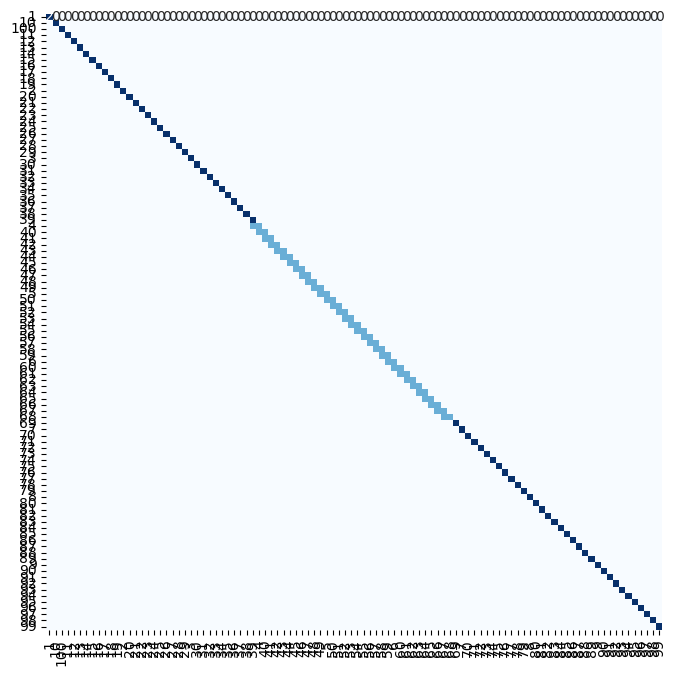

In [21]:
predictions = model.predict(test_datagen, verbose=1)

y_true = test_datagen.classes
y_pred = np.argmax(predictions,axis=1)
y_pred.sort()
# print(y_true)
# print(y_pred)
print(y_true==y_pred)
labels = list(test_datagen.class_indices.keys())

cm = confusion_matrix(y_true,y_pred)

# labels = ['1', '10', '100', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=labels, yticklabels= labels)

# ANN Model

In [1]:
# # Define the ANN architecture
# modelANN = models.Sequential([
#     layers.Flatten(input_shape=(img_height, img_width, 1)),  # Flatten the image
#     layers.Dense(512, activation='relu'),  # First hidden layer
#     layers.Dropout(0.3),  # Dropout again
#     layers.Dense(256, activation='relu'),  # First hidden layer
#     layers.Dropout(0.2),  # Dropout again
#     layers.Dense(256, activation='relu'),  # First hidden layer
#     layers.Dense(num_classes, activation='softmax')  # Output layer for 100 classes
# ])

# # Compile the model
# modelANN.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [2]:
# # Train the model
# historyANN = modelANN.fit(
#     train_datagen,
#     validation_data=test_datagen,
#     epochs=50  # Adjust the number of epochs as needed
# )

In [3]:
# # Evaluate the model
# test_loss, test_accuracy = modelANN.evaluate(test_datagen)
# print("Test accuracy ANN:", test_accuracy)

In [4]:
# import matplotlib.pyplot as plt

# # Plot the training loss over epochs
# plt.plot(historyANN.history['loss'], label='Training Loss')  # Training loss over epochs
# plt.plot(historyANN.history['val_loss'], label='Validation Loss')  # Training loss over epochs
# plt.xlabel('Epochs')  # X-axis label
# plt.ylabel('Loss')  # Y-axis label
# plt.title('Training Loss Over Epochs')  # Plot title
# plt.legend()  # Display the legend
# plt.show()  # Display the plot

# # Plot the training accuracy over epochs
# plt.plot(historyANN.history['accuracy'], label='Training Accuracy')  # Training accuracy over epochs
# plt.plot(historyANN.history['val_accuracy'], label='Validation Accuracy')  # Training accuracy over epochs
# plt.xlabel('Epochs')  # X-axis label
# plt.ylabel('Accuracy')  # Y-axis label
# plt.title('Training Accuracy Over Epochs')  # Plot title
# plt.legend()  # Display the legend
# plt.show()  # Display the plot


In [11]:
import tensorflow
import matplotlib
import numpy
import pandas
import sklearn

In [6]:
keras.__version__

'2.16.1'

In [9]:
!python -m tkinter

In [12]:
matplotlib.__version__

'3.8.4'

In [14]:
tensorflow.__version__

'2.16.1'